In [ ]:
import glob
import zipfile

files = glob.glob("*.zip")

for file in files:
    handle = zipfile.ZipFile(file)
    handle.extractall("images")
    handle.close()

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import random
import os
import math
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

%matplotlib inline

In [15]:
files = os.listdir("images/asianman/")

asianman_train = []
for file in files:
    img = mpimg.imread("images/asianman/" + file)
    asianman_train.append([img, 0])
print(len(asianman_train))

files = os.listdir("images/asianwomen/")

asianwomen_train = []
for file in files:
    img = mpimg.imread("images/asianwomen/" + file)
    asianwomen_train.append([img, 1])
print(len(asianwomen_train))

files = os.listdir("images/blackman/")

blackman_train = []
for file in files:
    img = mpimg.imread("images/blackman/" + file)
    blackman_train.append([img, 2])
print(len(blackman_train))

files = os.listdir("images/blackwoman/")

blackwoman_train = []
for file in files:
    img = mpimg.imread("images/blackwoman/" + file)
    blackwoman_train.append([img, 3])
print(len(blackwoman_train))

files = os.listdir("images/indianman/")

indianman_train = []
for file in files:
    img = mpimg.imread("images/indianman/" + file)
    indianman_train.append([img, 4])
print(len(indianman_train))

files = os.listdir("images/indianwoman/")

indianwoman_train = []
for file in files:
    img = mpimg.imread("images/indianwoman/" + file)
    indianwoman_train.append([img, 5])
print(len(indianwoman_train))

files = os.listdir("images/latinoman/")

latinoman_train = []
for file in files:
    img = mpimg.imread("images/latinoman/" + file)
    latinoman_train.append([img, 6])
print(len(latinoman_train))

files = os.listdir("images/latinowoman/")

latinowoman_train = []
for file in files:
    img = mpimg.imread("images/latinowoman/" + file)
    latinowoman_train.append([img, 7])
print(len(latinowoman_train))

files = os.listdir("images/whiteman/")

whiteman_train = []
for file in files:
    img = mpimg.imread("images/whiteman/" + file)
    whiteman_train.append([img, 8])
print(len(whiteman_train))

files = os.listdir("images/whitewoman/")

whitewoman_train = []
for file in files:
    img = mpimg.imread("images/whitewoman/" + file)
    whitewoman_train.append([img, 9])
print(len(whitewoman_train))

451
663
1980
1972
1829
1339
556
612
3698
2815


In [16]:
asianman_train = asianman_train * 8
print(len(asianman_train))

asianwomen_train = asianwomen_train * 5
print(len(asianwomen_train))

blackman_train = blackman_train * 2
print(len(blackman_train))

blackwoman_train = blackwoman_train * 2
print(len(blackwoman_train))

indianman_train = indianman_train * 2
print(len(indianman_train))

indianwoman_train = indianwoman_train * 2
print(len(indianwoman_train))

latinoman_train = latinoman_train * 6
print(len(latinoman_train))

latinowoman_train = latinowoman_train * 6
print(len(latinowoman_train))

training_data = asianman_train + asianwomen_train + blackman_train + blackwoman_train + indianman_train + indianwoman_train + latinoman_train + latinowoman_train + whiteman_train + whitewoman_train

print(len(training_data))

3608
3315
3960
3944
3658
2678
3336
3672
34684


6


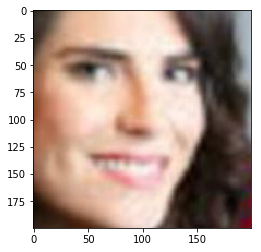

In [17]:
index = random.randint(0, len(training_data))
image = training_data[index][0].squeeze()

plt.imshow(image)
print(training_data[index][1])

1

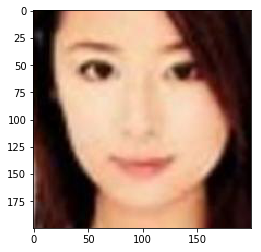

In [18]:
random.shuffle(training_data)

plt.imshow(training_data[0][0])
training_data[0][1]

In [19]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
    
X_train = np.array(X_train)

4


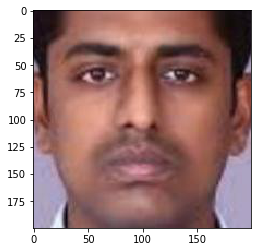

In [20]:
index = random.randint(0, len(training_data))
image = training_data[index][0].squeeze()

plt.imshow(image)
print(training_data[index][1])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.24, random_state = 0)

print("Updated Image /Shape: {}".format(X_train[0].shape))

Updated Image /Shape: (200, 200, 3)


In [22]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

n_test = len(X_test)

# What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of test examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 26359
Number of test examples = 8325
Image data shape = (200, 200, 3)
Number of classes = 10


4


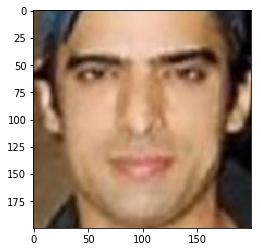

In [23]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.imshow(image)
print(y_train[index])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: (x / 127.5) - 1., input_shape = (200, 200, 3)))
model.add(Conv2D(24, (5, 5), strides = (2,2), activation = 'relu'))
model.add(Conv2D(36, (5, 5), strides = (2,2), activation = 'relu'))
model.add(Conv2D(48, (5, 5), strides = (2,2), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.core import Dropout

model = Sequential()
model.add(Lambda(lambda x: (x / 127.5) - 1., input_shape = (200, 200, 3)))
model.add(Conv2D(28, 5, strides = (1,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Conv2D(36, 5, strides = (1,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(48, 5, strides = (2,2), activation = 'relu'))
model.add(Conv2D(64, 3, strides = (2,2), activation = 'relu'))
model.add(Conv2D(64, 3, strides = (2,2), activation = 'relu'))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation='relu'))
model.add(Dense(10))

Using TensorFlow backend.


In [24]:
from keras.models import Sequential
from keras.layers import Lambda
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: (x / 127.5) - 1., input_shape = (200, 200, 3)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
from keras.models import Sequential
from keras.layers import Lambda
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: (x / 127.5) - 1., input_shape = (200, 200, 3)))
model.add(Conv2D(24, (5, 5), strides = (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(24, (5, 5), strides = (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(84))          
model.add(Activation('relu'))
model.add(Dense(10))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

# compile and fit the model
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_train, y_one_hot, epochs=10, validation_split=0.2, shuffle = True)

model.save('model.h5')

Train on 21087 samples, validate on 5272 samples
Epoch 1/10
21087/21087 [==============================] - 89s 4ms/step - loss: 14.4018 - acc: 0.1054 - val_loss: 14.5191 - val_acc: 0.0992
Epoch 2/10
21087/21087 [==============================] - 77s 4ms/step - loss: 14.4174 - acc: 0.1055 - val_loss: 14.5191 - val_acc: 0.0992
Epoch 3/10
21087/21087 [==============================] - 77s 4ms/step - loss: 14.4174 - acc: 0.1055 - val_loss: 14.5191 - val_acc: 0.0992
Epoch 4/10
16096/21087 [=====================>........] - ETA: 17s - loss: 14.4278 - acc: 0.1049

In [ ]:
# preprocess data
X_normalized_test = np.array(X_test / 255.0 - 0.5 )
y_one_hot_test = label_binarizer.fit_transform(y_test)

print("Testing")

metrics = model.evaluate(X_normalized_test, y_one_hot_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))